### Exercise 3: Binary classification

Name and student id: Mariia Chernova 1908135

In [28]:
import statistics
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.utils.extmath import cartesian
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold

Read csv data from file 'exercise03.csv' into variable data. Data has three columns; two x-values, and y value (-1, 1) on each row.

In [29]:
data = genfromtxt('exercise03.csv', delimiter=',', skip_header=1)
# raise NotImplementedError()

In [30]:
assert(data.shape[1] == 3)

Split data into x (features) and y (labels).

In [31]:
x = data[:,0:2]  
y = data[:,2]
# raise NotImplementedError()

In [32]:
assert(x.shape[1] == 2)

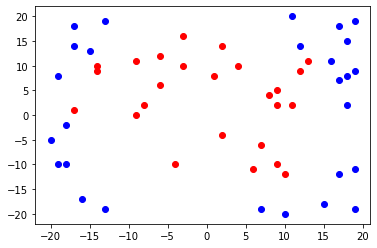

In [33]:
plt.plot(x[y==-1][:,0], x[y==-1][:,1], 'ro')
plt.plot(x[y==1][:,0], x[y==1][:,1], 'bo')
plt.show()

Is the data linearly separable, ie. can red and blue dots be (almost) separated by a line? Write your answer in the next cell.

In [34]:
# assing value "Yes" or "No" to variable answer.
answer = 'No'
# YOUR CODE HERE
# raise NotImplementedError()

Scale features using StandardScaler. Assign scaled feature data to variable scaled_x.

In [35]:
scaler = preprocessing.StandardScaler().fit(x)
scaled_x = scaler.transform(x)
# raise NotImplementedErraor()

In [36]:
np.testing.assert_almost_equal(scaled_x.mean(axis=0),0.0, decimal=3)

#### SVC with RBF kernel

To estimate a good value for gamma parameter, we'll loop over a list of gammas (numpy array gammas in cell below). For each gamma value we'll use KFold() object to perform K-Fold validation - otherwise metrics for different gammas would have too much variance and deciding on the best one would be hard. We'll use the model object score() method to compute score for training and test sets separately and store them in numpy arrays. After all folds for a gamma value have been scored, we'll average the scores. Finally, the gamma with highest testing score is selected. To get more intuition, we'll also plot the values in gamma/score diagram.

Tasks to do

1) Assign reasonable values to gamma array to find the best gamma value. Note that you can experiment with this after you have completed the other steps

2) Use train_index and test_index to access your whole data set so as to get training and test data sets for one round of training and evaluation

3) Create a model object and train it. Note that re-using model object (repeadetly calling fit()) will continue training on top of the earlier result.

4) Use the model to get training and test scores

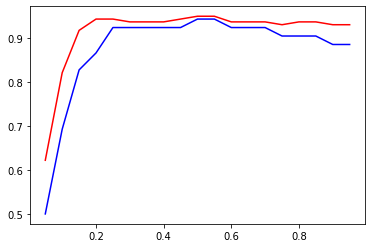

Gamma with highest test score 0.5


In [44]:
gammas = np.arange(0.05, 1, 0.05)
# gammas = np.array([0.3, 0.5])
# gammas = [0.01, 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
#        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]
# YOUR CODE HERE
# raise NotImplementedError()
avtrainscores = np.empty_like(gammas)
avtestscores = np.empty_like(gammas)

for idx, gamma in enumerate(gammas):

    kf = KFold(n_splits = 4)
    train_scores = []
    test_scores = []
    
    m = []
    for i in range(4):
        m.append(SVC(gamma=gamma))

    for train_index, test_index in kf.split(scaled_x):
        # 2) get x_train, x_test and y_train, y_test by the indices
        x_train = scaled_x[train_index, :]
        x_test = scaled_x[test_index, :]
        y_train = y[train_index]
        y_test = y[test_index]
        # YOUR CODE HERE
#         raise NotImplementedError()
        
        # 3) create an SVC() model object with the gamma parameter specified and fit it    
        if test_index[0] == 0:
            ix = 0
        elif test_index[1] == 14:
            ix = 1
        elif test_index[2] == 27:
            ix = 2
        elif test_index[3] == 40:
            ix = 3
#         model = SVC(gamma=gamma)
        m[ix].fit(x_train, y_train)
        # YOUR CODE HERE
#         raise NotImplementedError()
        
        # 4) Assign scores to train_score and test_score
        train_score = m[ix].score(x_train, y_train)
        test_score = m[ix].score(x_test, y_test)

        # YOUR CODE HERE
#         raise NotImplementedError()
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    # averages for current gamma
    avtrainscores[idx] = statistics.mean(train_scores)
    avtestscores[idx] = statistics.mean(test_scores)
    
plt.plot(gammas, avtrainscores, 'r', label="Average training score")
plt.plot(gammas, avtestscores, 'b')
plt.show()
best_gamma = gammas[np.argmax(avtestscores)]
print("Gamma with highest test score", best_gamma)

In [45]:
np.testing.assert_almost_equal(best_gamma, 0.5, decimal=1)

Let's plot the decision area. Try out different gammas to get more intuition on how it affects the decision boundary.

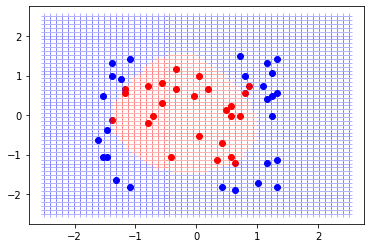

In [46]:
model = SVC(gamma=best_gamma)
model.fit(x_train,y_train)

x1s = np.linspace(-2.5,2.5,y.shape[0])
x2s = np.linspace(-2.5,2.5,y.shape[0])
xs = cartesian((x1s,x2s))

cfs = model.predict(xs)

plt.plot(scaled_x[y == -1][:,0], scaled_x[y == -1][:,1], 'ro')
plt.plot(scaled_x[y == 1][:,0], scaled_x[y == 1][:,1], 'bo')
plt.plot(xs[cfs==-1][:,0],xs[cfs==-1][:,1],'r+',alpha=0.3)
plt.plot(xs[cfs==1][:,0],xs[cfs==1][:,1],'b+',alpha=0.3)
plt.show()